# Wind analysis assignment

The main goal of this assignment is to learn how to manage real weather information in order to stimate the energy potential of a specific location.

Libraries needed in this exercice

In [72]:
import sys
import math
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as s
import matplotlib.pyplot as plt
%matplotlib inline

Python version

In [ ]:
sys.version

## Read csv file with weather information

headers = ['col1', 'col2', 'col3', 'col4']

dtypes = ['datetime', 'datetime', 'str', 'float']

pd.read_csv(file, sep='\t', header=None, names=headers, dtype=dtypes)

In [56]:
def parse_dates(x):
    return dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')

In [58]:
headers=['time','WindSpeed','WindDir','SolarRad','AmbTemp']
df = pd.read_csv('./weather_data_01.csv', delimiter=";", header=1, names=headers, parse_dates=[0], date_parser=parse_dates)

In [66]:
print(list(rdf))
print(df.dtypes)
df.head()

['time', 'WindSpeed', 'WindDir', 'SolarRad', 'AmbTemp']
time         datetime64[ns]
WindSpeed           float64
WindDir               int64
SolarRad              int64
AmbTemp             float64
dtype: object


,time,WindSpeed,WindDir,SolarRad,AmbTemp
0,2013-01-01 00:10:00,6.1,256,0,7.0
1,2013-01-01 00:15:00,5.4,253,0,6.8
2,2013-01-01 00:20:00,5.8,252,0,6.8
3,2013-01-01 00:25:00,5.6,254,0,6.7
4,2013-01-01 00:30:00,5.1,246,0,6.6


In [52]:
N=len(df.index)
print('Number of measurements: ' + str(N))

Number of measurements: 85191


## Filter data according datetime criteria

In [ ]:
df.ix[datetime.date(year=2013,month=1,day=1):datetime.date(year=2013,month=1,day=31)]

In [63]:
rdf=df[(df['time'] > '2013-01-01 00:00:00') & (df['time'] < '2013-02-01 00:00:00')]
Nrdf=len(rdf.index)
print('Number of measurements: ' + str(Nrdf))

Number of measurements: 7281


In [64]:
print(rdf)

                    time  WindSpeed  WindDir  SolarRad  AmbTemp
0    2013-01-01 00:10:00        6.1      256         0      7.0
1    2013-01-01 00:15:00        5.4      253         0      6.8
2    2013-01-01 00:20:00        5.8      252         0      6.8
3    2013-01-01 00:25:00        5.6      254         0      6.7
4    2013-01-01 00:30:00        5.1      246         0      6.6
5    2013-01-01 00:35:00        5.2      240         0      6.6
6    2013-01-01 00:40:00        5.4      239         0      6.7
7    2013-01-01 00:45:00        5.3      235         0      6.7
8    2013-01-01 00:50:00        5.6      239         0      6.7
9    2013-01-01 00:55:00        5.8      238         0      6.6
10   2013-01-01 01:00:00        6.5      240         0      6.4
11   2013-01-01 01:05:00        6.4      236         0      6.2
12   2013-01-01 01:10:00        5.9      231         0      6.1
13   2013-01-01 01:15:00        5.1      225         0      5.8
14   2013-01-01 01:20:00        4.9     

## Some statistical data

In [75]:
np.mean(rdf['WindSpeed'])

4.659950556242266

In [76]:
np.min(rdf['WindSpeed'])

0.20000000000000001

In [78]:
np.max(rdf['WindSpeed'])

15.199999999999999

(4.2463249752758152, 1.7587235048049086)
(0.20000000000000001, 15.199999999999999)


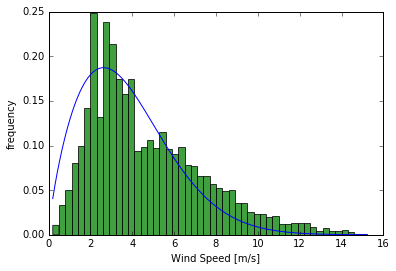

In [74]:
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)


data=rdf['WindSpeed']

(loc, scale) = s.exponweib.fit_loc_scale(data, 0.1, 0.5)
print(loc, scale)

print(data.min(),data.max())


x = np.linspace(data.min(), data.max(), 1000)

#plt.plot(data)

plt.plot(x, weib(x, loc, scale))
n, bins, patches = plt.hist(data, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('frequency')
plt.show()

In [84]:
print(n.sum())
2.4999999999999996
print(np.sum(n*np.diff(bins)))

3.33333333333
1.0


The month of January has 7281 '5-minute' intervals

In [93]:
intervals=31*24*12
print(intervals)

8928


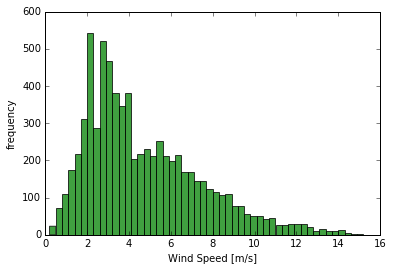

In [89]:
n, bins, patches = plt.hist(data, 50, normed=0, facecolor='green', alpha=0.75)
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('frequency')
plt.show()

In [91]:
sum(n)

7281.0